<a href="https://colab.research.google.com/github/silverstone122004-create/SIMULATION-ACTIVITY/blob/main/Aves-%20chap%209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **standard brownian motion**

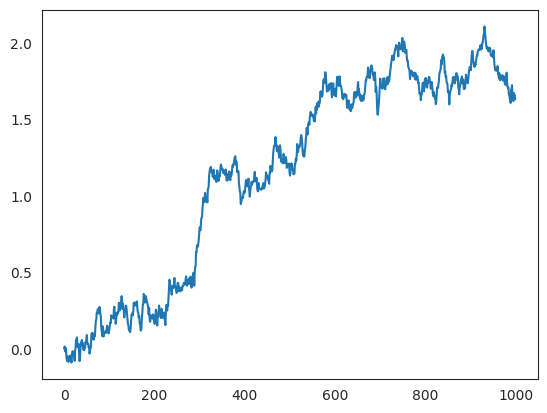

In [100]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(4)

n = 1000

sqn = 1/np.sqrt(n)

z_values = np.random.randn(n)

Yk = 0

sb_motion=list()

for k in range(n):
    Yk = Yk + sqn*z_values[k]
    sb_motion.append(Yk)

plt.plot(sb_motion)
plt.show()

Value at risk

/tmp/ipython-input-556906996.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  StockData = yf.download(StockList, start=StartDay, end=EndDay)
[*********************100%***********************]  6 of 6 completed


Ticker        ADBE        CSCO         HPQ         IBM        MSFT        NVDA
count   251.000000  251.000000  251.000000  251.000000  251.000000  251.000000
mean    560.587969   46.823288   26.129985  107.593802  265.795896   19.439842
std      76.331620    4.196872    2.860608    7.383321   36.115529    5.840770
min     421.200012   38.239323   20.583450   92.169502  203.662323   11.561382
25%     488.220001   44.993099   24.398899  101.329388  234.531403   14.277210
50%     569.359985   47.239452   25.708998  110.387962  267.029449   19.163715
75%     632.470001   49.637589   27.612721  113.886597  291.183884   22.187538
max     688.369995   56.807388   33.388432  120.489151  331.987335   33.309246


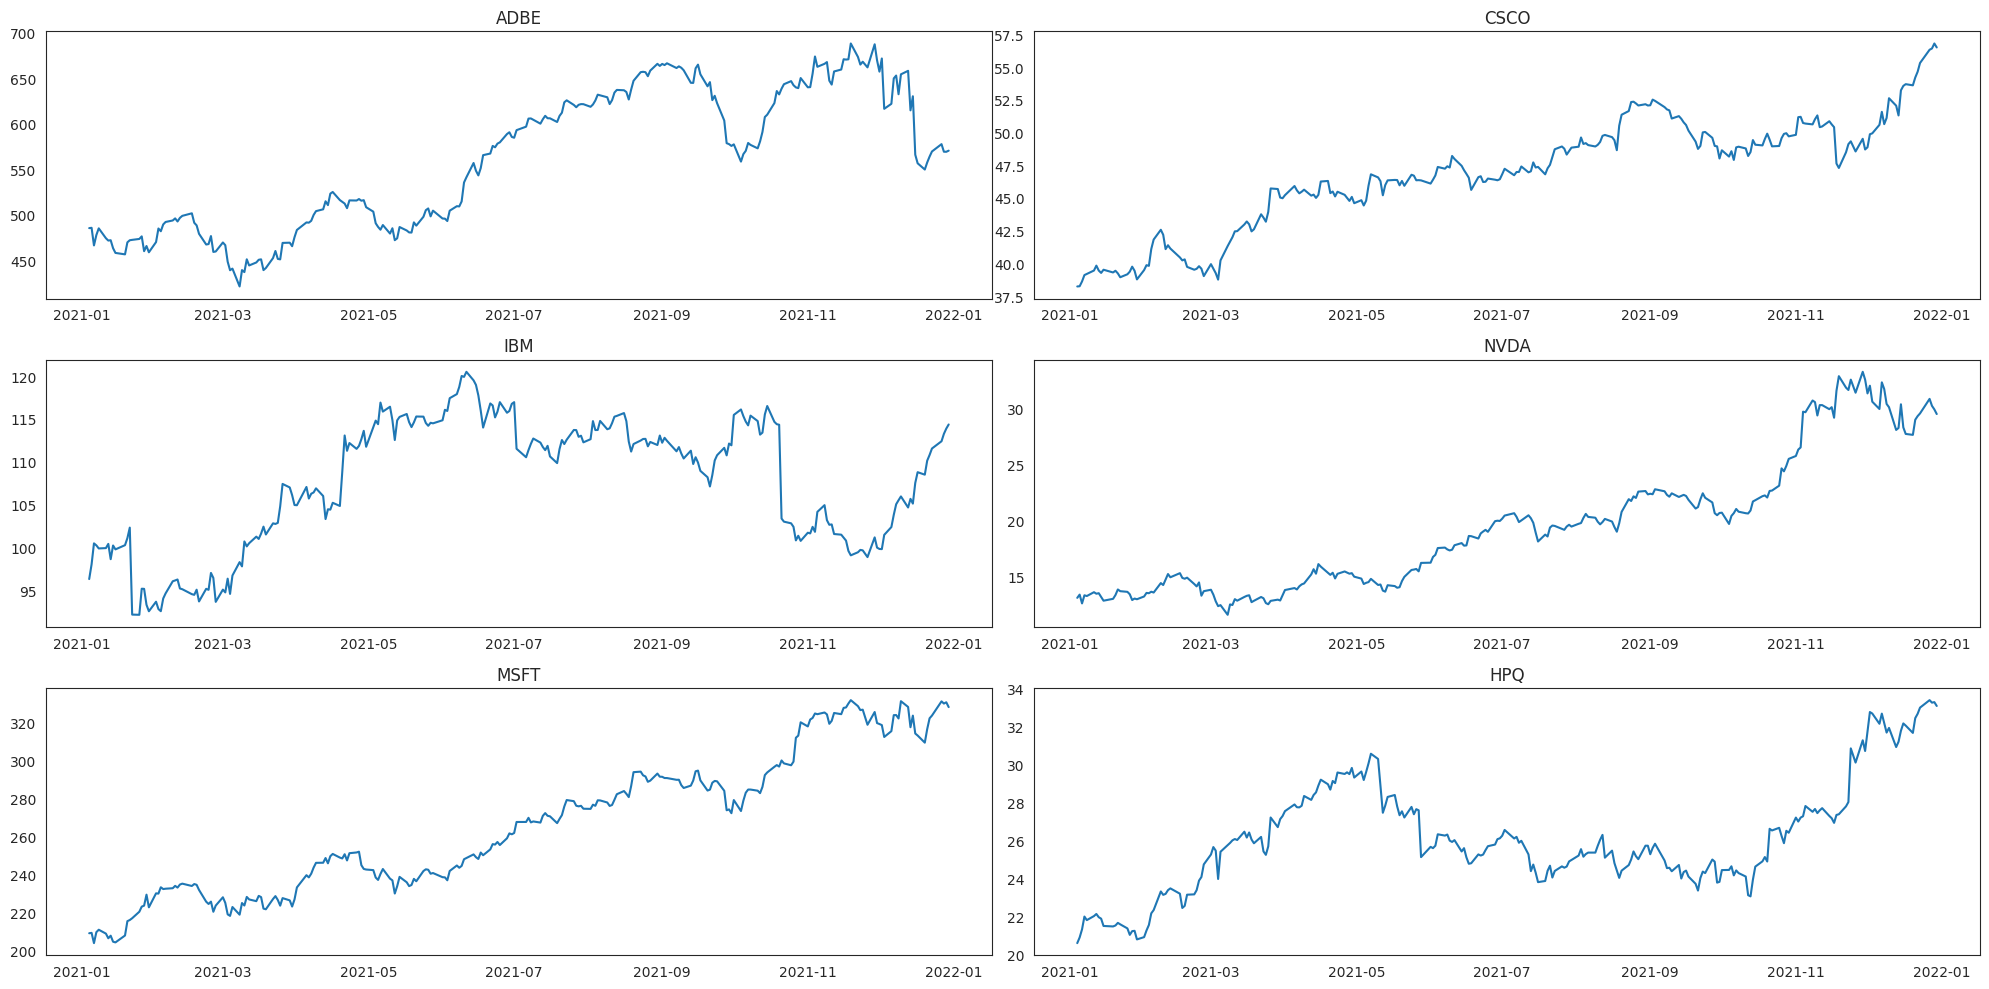

Ticker          ADBE      CSCO       HPQ       IBM      MSFT      NVDA
Date                                                                  
2021-12-09 -0.031435  0.009295 -0.015255  0.004471 -0.005583 -0.041978
2021-12-10  0.034589  0.029539  0.007746  0.004208  0.028340 -0.009577
2021-12-13  0.005883 -0.010801 -0.031568 -0.012168 -0.009167 -0.067455
2021-12-14 -0.065988 -0.014332  0.009070  0.009626 -0.032587  0.006250
2021-12-15  0.025160  0.037390  0.018540 -0.005252  0.019218  0.074884
2021-12-16 -0.101915  0.006341  0.012135  0.022906 -0.029135 -0.068026
2021-12-17 -0.016693  0.002487 -0.003543  0.011673 -0.003386 -0.020643
2021-12-20 -0.012342 -0.001654 -0.012032 -0.002669 -0.012014 -0.002950
2021-12-21  0.014097  0.011100  0.024633  0.015032  0.023069  0.048919
2021-12-22  0.011587  0.008193  0.007023  0.006048  0.018057  0.011178
2021-12-23  0.010000  0.012189  0.009925  0.006782  0.004472  0.008163
2021-12-27  0.014150  0.018304  0.011953  0.007579  0.023186  0.044028
2021-1

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [104]:
import datetime as dt
import numpy as np
import yfinance as yf  # Changed from pandas_datareader.data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

StockList = ['ADBE','CSCO','IBM','NVDA','MSFT','HPQ']
StartDay = dt.datetime(2021, 1, 1)
EndDay = dt.datetime(2021, 12, 31)

# Fetch data using yfinance
StockData = yf.download(StockList, start=StartDay, end=EndDay)
StockClose = StockData["Close"]
print(StockClose.describe())


fig, axs = plt.subplots(3, 2, figsize=(20,10))
axs[0, 0].plot(StockClose['ADBE'])
axs[0, 0].set_title('ADBE')
axs[0, 1].plot(StockClose['CSCO'])
axs[0, 1].set_title('CSCO')
axs[1, 0].plot(StockClose['IBM'])
axs[1, 0].set_title('IBM')
axs[1, 1].plot(StockClose['NVDA'])
axs[1, 1].set_title('NVDA')
axs[2, 0].plot(StockClose['MSFT'])
axs[2, 0].set_title('MSFT')
axs[2, 1].plot(StockClose['HPQ'])
axs[2, 1].set_title('HPQ')
plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()


StockReturns = StockClose.pct_change()
print(StockReturns.tail(15))

PortvolioValue = 1000000000.00
ConfidenceValue = 0.95
MeanStockRet = np.mean(StockReturns)
StdStockRet = np.std(StockReturns)

WorkingDays2021 = 252.
AnnualizedMeanStockRet = MeanStockRet/WorkingDays2021
AnnualizedStdStockRet = StdStockRet/np.sqrt(WorkingDays2021)

INPD = norm.ppf(1-ConfidenceValue,AnnualizedMeanStockRet,AnnualizedStdStockRet)
VaR = PortvolioValue*INPD

RoundVaR=np.round(VaR,2)

for i in range(len(StockList)):
    print("Value-at-Risk for", StockList[i], "is equal to ",RoundVaR[i])